In [73]:
%matplotlib inline
from sys import path
import os
my_home = os.popen("echo $MYWORK_DIR").readlines()[0][:-1]
path.append('%s/work/mylib/' % my_home)

import numpy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from plot_tool import Image_Plot
import tool_box
import h5py

In [74]:
source = "dimmer"

config_path = "%s/work/envs/envs.dat"%my_home
total_path, para_path = tool_box.config(config_path, ['get', 'get'],
                                                   [['selection_bias', "%s_path"%source, '1'],
                                                    ['selection_bias', "%s_path_para"%source, '1']])
print(total_path)
pic_path = "/home/hkli/work/jupyter_run/pic/%s/"%source
if not os.path.exists(pic_path):
    os.mkdir(pic_path)

/mnt/ddnfs/data_users/hkli/selection_bias_real_dimmer/


M & C of all source exist
[[ -1.68794993e-05]
 [  1.68973732e-05]
 [  2.29828584e-04]
 [  8.83976137e-04]]
[[ -5.71023971e-07]
 [  1.69327850e-05]
 [  1.44984553e-04]
 [  8.85183752e-04]]


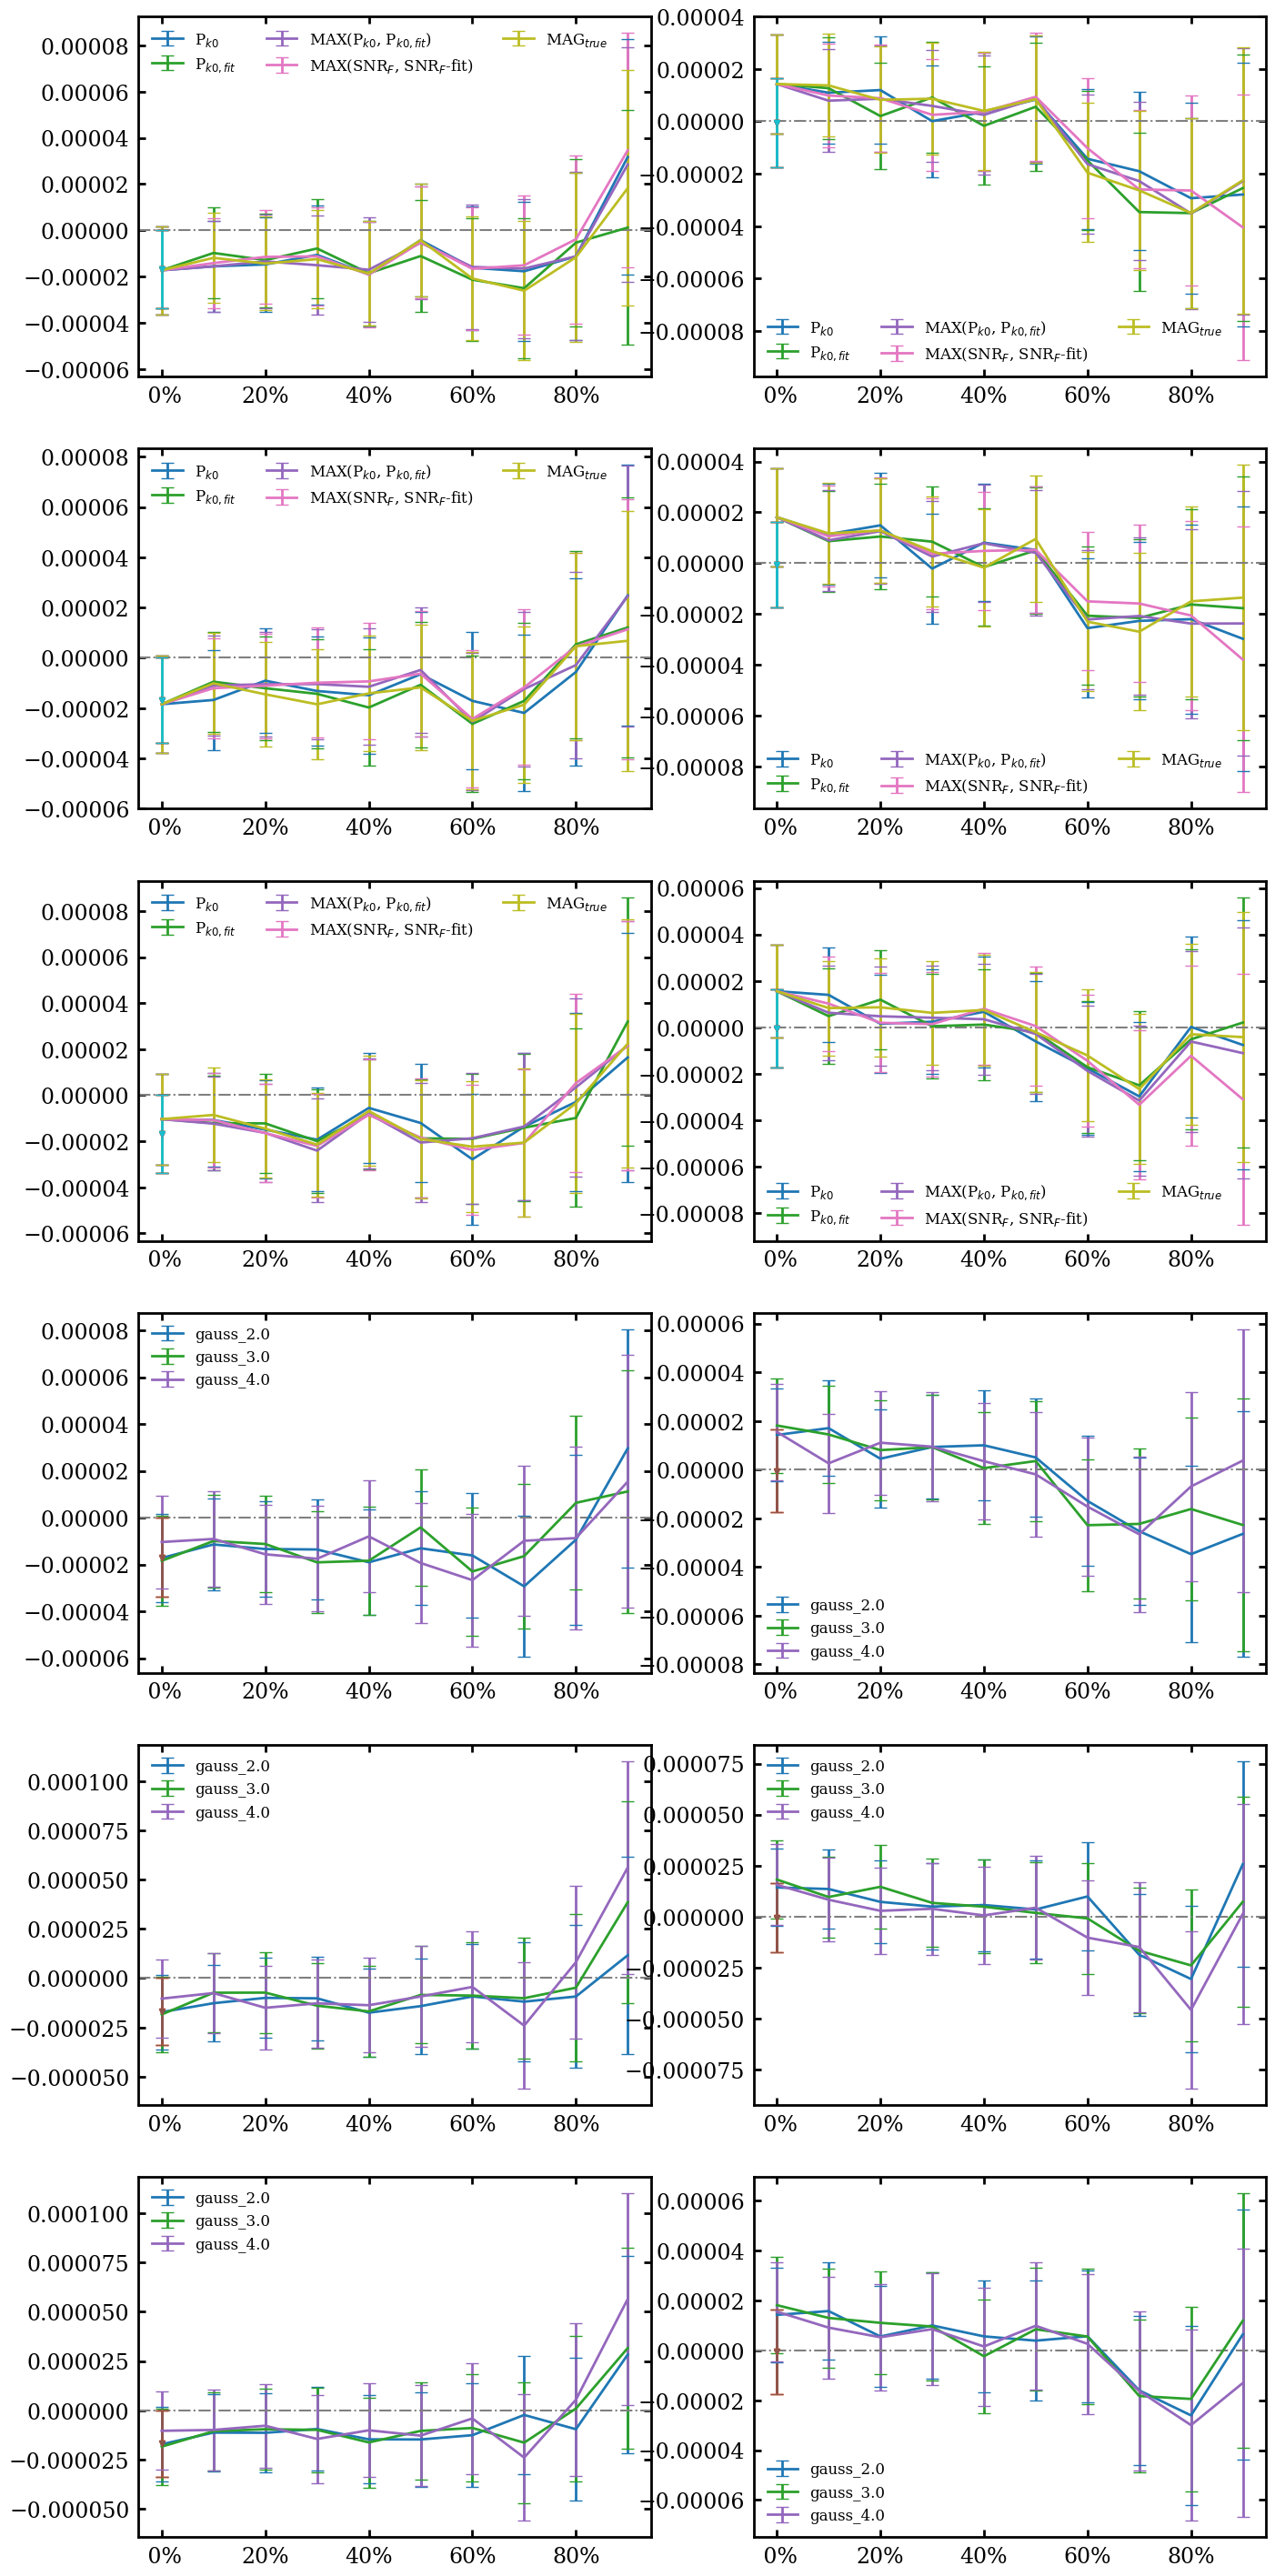

In [81]:
sig = "4"
mc_plot = 'c'

lim = 0
if mc_plot == "m":
    plot_tag = 0
    stand = 1
else:
    plot_tag = 2
    stand = 0

mc_all_path = total_path + "result/data/shear_result.hdf5"
mc_all_exist = os.path.exists(mc_all_path)
if mc_all_exist:
    print("M & C of all source exist")
    h5f_mc = h5py.File(mc_all_path, "r")
    mc1 = h5f_mc["/mc1"].value
    mc2 = h5f_mc["/mc2"].value
    print(mc1)
    print(mc2)
    m_all = [mc1[2], mc2[2]]
    m_sig_all = [mc1[3], mc2[3]]
    c_all = [mc1[0], mc2[0]]
    c_sig_all = [mc1[1], mc2[1]]
else:
    print("M & C of all source don't exist")

xfmt = '%2.f%%'

names = ["P$_{k0}$", "P$_{k0,fit}$", "MAX(P$_{k0}$, P$_{k0,fit}$)", "MAX(SNR$_F$, SNR$_F$-fit)", "MAG$_{true}$"]
files = ["flux2_ex1","flux2_ex2", "flux2_ex3", "flux2_ex4", "flux2_ex5"]
sex_files = ["mag_auto", "snr_auto","sex_snr"]
gauss_name = ["gauss_2.0","gauss_3.0","gauss_4.0"]

ch_num = 9
cuts_num = 10
x_coord = [i * cuts_num for i in range(ch_num)]
ch = numpy.arange(cuts_num)
ylabels = ["m$_1 \\times 10^2$", "m$_2 \\times 10^2$", "m$_1 \\times 10^2$", "m$_2 \\times 10^2$"]

filter_names = ["sex2_","sex3_",  "sex4_"]

img = Image_Plot()
img.set_style()
img.plot_img(6,2)

for row in range(6):
        if row < 3:
            for tag, file_nm in enumerate(files):
                data_path = total_path + "result/cuts/sym/%s%s/%s/total.hdf5"%(filter_names[row], sig, file_nm)
                h5f = h5py.File(data_path,"r")                
#                 print(data_path)
                for col in range(2):
    #                 hdf5: "/mc1", "/mc2", "/shear", "num"
                    data = h5f["/mc%d"%(col+1)].value
    #                 [[m],[m_sig],[c],[c_sig]]
                    pts_show = data[:,ch][plot_tag]
                    pts_err = data[:,ch][plot_tag+1]
                    img.axs[row][col].errorbar(ch*10.,pts_show, pts_err, linewidth=img.plt_line_width,capsize=img.cap_size, ms=5, label=names[tag])
                    if tag == 0:
                        xs = img.axs[row][col].set_xlim()
                        img.axs[row][col].plot([xs[0], xs[1]],[0,0], linestyle="-.", c='grey')
                    img.axis_major_formatter(row, col, 1, xfmt)
                    img.axs[row][col].legend(ncol=3,fontsize=img.legend_size-5,frameon=False)
                    if mc_all_exist:
                        if mc_plot == "m":
                            img.axs[row][col].errorbar(ch[0]*10, m_all[col], m_sig_all[col], linewidth=img.plt_line_width,capsize=img.cap_size, ms=5,marker="v" )
                        else:
                            img.axs[row][col].errorbar(ch[0]*10, c_all[col], c_sig_all[col],linewidth=img.plt_line_width,capsize=img.cap_size, ms=5, marker="v" )
                h5f.close()
        else:
            for tag, filter_nm in enumerate(filter_names):
                data_path = total_path + "result/cuts/sym/%s%s/%s/total.hdf5"%(filter_nm, sig, sex_files[row-3])
                h5f = h5py.File(data_path,"r")                
                for col in range(2):
    #                 hdf5: "/mc1", "/mc2", "/shear", "num"
                    data = h5f["/mc%d"%(col+1)].value
    #                 [[m],[m_sig],[c],[c_sig]]
                    pts_show = data[:,ch][plot_tag]
                    pts_err = data[:,ch][plot_tag+1]
                    img.axs[row][col].errorbar(ch*10.,pts_show, pts_err, linewidth=img.plt_line_width,capsize=img.cap_size, ms=5, label=gauss_name[tag])
                    if tag == 0:
                        xs = img.axs[row][col].set_xlim()
                        img.axs[row][col].plot([xs[0], xs[1]],[0,0], linestyle="-.", c='grey')
                    img.axis_major_formatter(row, col, 1, xfmt)
                    img.axs[row][col].legend(ncol=1,fontsize=img.legend_size-5,frameon=False)
                    
                    if mc_all_exist:
                        if mc_plot == "m":
                            img.axs[row][col].errorbar(ch[0]*10, m_all[col], m_sig_all[col], linewidth=img.plt_line_width,capsize=img.cap_size, ms=5,marker="v" )
                        else:
                            img.axs[row][col].errorbar(ch[0]*10, c_all[col], c_sig_all[col],linewidth=img.plt_line_width,capsize=img.cap_size, ms=5, marker="v" )
                h5f.close()
                
img.save_img(pic_path+"%s_%s.pdf"%(mc_plot, sig))